# CamScanner Page Detection using OpenCv

## Steps Involved:
1. Image Blurring
2. Edge Detection
3. Contour Extraction
4. Best Contour Selection
5. Projection to Fixed Sized Screen

## Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract

## Getting Images

(2448, 3264, 3)
(800, 1500, 3)


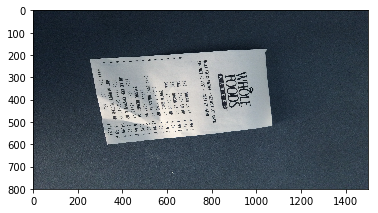

In [2]:
im_path1 = './receipt.jpg'
img1 = cv2.imread(im_path1)
print img1.shape
img1 = cv2.resize(img1,(1500,800))
print img1.shape
plt.imshow(img1)
plt.show()

## Image Blurring

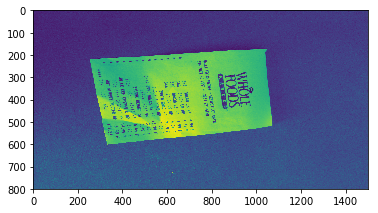

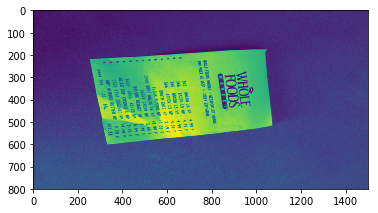

In [3]:
orig1 = img1.copy()
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(gray1)
plt.show()
blurred1 = cv2.GaussianBlur(gray1, (5,5), 0)
plt.imshow(blurred1)
plt.show()

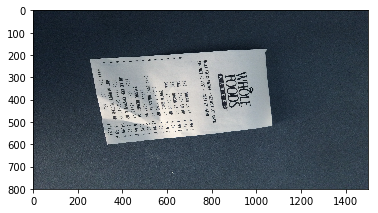

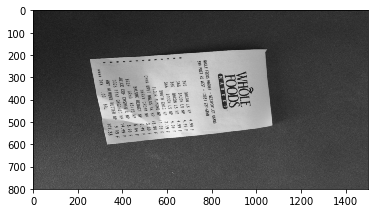

In [4]:
regen1 = cv2.cvtColor(blurred1,cv2.COLOR_GRAY2BGR)
plt.imshow(orig1)
plt.show()
plt.imshow(regen1)
plt.show()

## Edge Detection

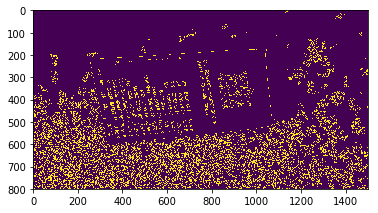

In [5]:
edged1 = cv2.Canny(blurred1, 0, 50)
orig_edged1 = edged1.copy()
plt.imshow(orig_edged1)
plt.show()

## Contours Extraction

In [6]:
_, contours1, _ = cv2.findContours(edged1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print len(contours1)
contours1 = sorted(contours1, reverse=True, key=cv2.contourArea)

4498


## Best Contour Selection

In [7]:
for c in contours1:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*p, True)
    if len(approx)==4:
        target1 = approx
        break
print target1.shape

(4, 1, 2)


## Reorder Target Contours

In [8]:
def reorder(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2), dtype=np.float32)
    
    add = h.sum(axis=1)
    hnew[3] = h[np.argmin(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis=1)
    hnew[0] = h[np.argmin(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew

In [9]:
reorder1 = reorder(target1)

## Project to Fixed Sized Screen

In [10]:
input_represent1 = reorder1
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [11]:
pers_change1 =  cv2.getPerspectiveTransform (input_represent1, output_map)
ans1 = cv2.warpPerspective(orig1, pers_change1, (800,800))

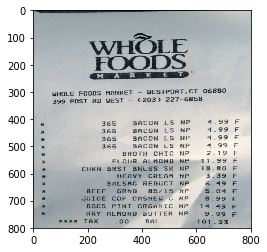

In [12]:
plt.imshow(ans1)
plt.show()

## Image Blurring to Improve Qualtiy

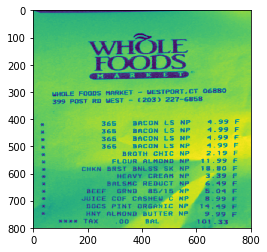

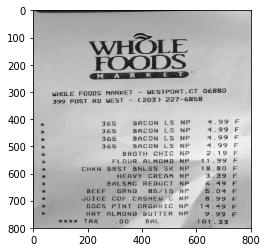

In [13]:
ans1_Gray = cv2.cvtColor(ans1, cv2.COLOR_BGR2GRAY)
temp1 = cv2.GaussianBlur(ans1_Gray, (5,5), 0)
plt.imshow(temp1)
plt.show()
final_ans1 = cv2.cvtColor(temp1, cv2.COLOR_GRAY2BGR)
plt.imshow(final_ans1)
plt.show()

## OCR

In [16]:
text1 = pytesseract.image_to_string(ans1)

In [17]:
print text1

'3‘.llt£l‘XIX

UHDLE FOODS HHRKET
399 POST RD UEST

WHﬁLE
FOODS

 

365 BRCON LS
365 BRCUN LS
365 BRCON LS
365 BRCON LS
BRDTH CHIC
FLOUR RLHOND

CHKN BRST BNLSS SK
HERVY CRERH
BHLSHC REDUCT
BEEF GRND 85/15
JUICE CUF CRSHEU C
DOCS PINT ORGRNIC
HNY HLHDND BUTTER

*“l' Tax .00 BBL

NP
NP
NP
NP
NP
NP
NP
NP
NP
NP
NP
NP
NP

 

- UESTPDRT.CT 06880
- (203) 227—6858

*n‘n'n'n-nm-nnmnﬁmm
